In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine-clustering.csv')
print(data.shape)
print(data.head())

(178, 13)
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3 

In [ ]:
# 기본 통계량 확인
print(data.describe())

# 결측값 확인
print(data.isnull().sum())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화 (Z-점수 표준화)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 정규화된 데이터프레임으로 변환
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
print(data_scaled.head())

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.96524

In [ ]:
# Dunn Index 계산 함수
def dunn_index(data, labels):
    """
    Dunn Index를 계산하는 함수.
    :param data: 입력 데이터 (numpy array)
    :param labels: 각 데이터 포인트의 군집 레이블 (numpy array)
    :return: Dunn Index 값 (float)
    """
    unique_cluster_labels = np.unique(labels)
    num_clusters = len(unique_cluster_labels)

    if num_clusters == 1:
        return 0

    # 클러스터 간 최소 거리 계산
    inter_cluster_distances = []
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i = data[labels == unique_cluster_labels[i]]
            cluster_j = data[labels == unique_cluster_labels[j]]
            inter_cluster_distances.append(np.min(pairwise_distances(cluster_i, cluster_j)))

    # 클러스터 내 최대 거리 계산
    intra_cluster_distances = []
    for i in range(num_clusters):
        cluster_i = data[labels == unique_cluster_labels[i]]
        intra_cluster_distances.append(np.max(pairwise_distances(cluster_i, cluster_i)))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings(action='ignore')

# 변수 초기화
k_values = range(2, 16)
silhouette_scores = []
dunn_scores = []

# 시간 측정 시작
start_time = time.time()

# 각 k에 대해 K-means 군집화 및 실루엣 점수 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    dunn_avg = dunn_index(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    dunn_scores.append(dunn_avg)

# 시간 측정 종료
end_time = time.time()

# 최적의 k 값 찾기 (Silhouette Score 기준)
best_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
total_time = end_time - start_time

# Dunn Index와 Silhouette Score 출력
print("\n군집 수에 따른 Dunn Index와 Silhouette Score")
print("K\tDunn Index\tSilhouette Score")
for k, dunn, silhouette in zip(k_values, dunn_scores, silhouette_scores):
    print(f"{k}\t{dunn:.5f}\t\t{silhouette:.5f}")

print(f'실루엣 지표 기준 최적의 군집 수는 {best_k_silhouette}, 최적의 군집을 탐색하는 데 걸린 시간 {total_time:.5f}')


군집 수에 따른 Dunn Index와 Silhouette Score
K	Dunn Index	Silhouette Score
2	0.16040		0.26831
3	0.23226		0.28486
4	0.15149		0.25173
5	0.17344		0.22717
6	0.17675		0.19582
7	0.17675		0.20913
8	0.16889		0.13582
9	0.17675		0.14576
10	0.23169		0.13395
11	0.20431		0.14151
12	0.20637		0.12944
13	0.19667		0.12690
14	0.21955		0.13587
15	0.19412		0.13754
실루엣 지표 기준 최적의 군집 수는 3, 최적의 군집을 탐색하는 데 걸린 시간 0.91723


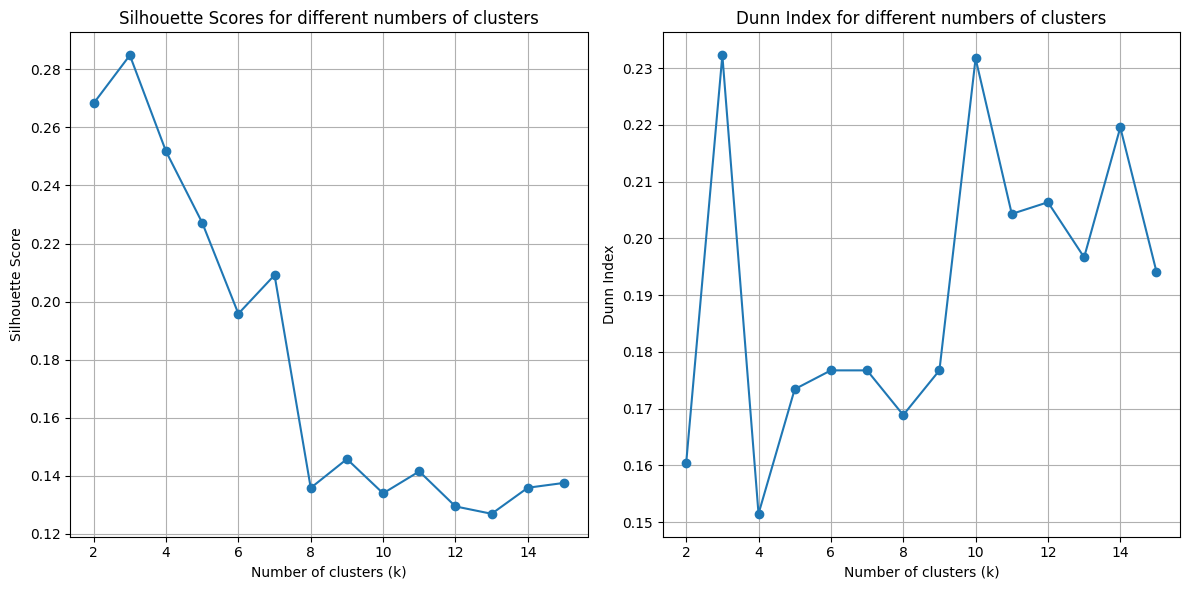

In [ ]:
# Silhouette Score와 Dunn Index 그래프 출력
plt.figure(figsize=(12, 6))


# Silhouette Score 그래프
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid(True)

# Dunn Index 그래프
plt.subplot(1, 2, 2)
plt.plot(k_values, dunn_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for different numbers of clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 10회 반복 클러스터링 수행
results = []
for i in range(10):
    kmeans = KMeans(n_clusters=3, random_state=i)
    kmeans.fit(data_scaled)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    cluster_sizes = np.unique(labels, return_counts=True)[1]
    results.append((centroids, cluster_sizes, labels))

# 클러스터 중심점 비교 함수
def are_clusters_identical(centroids1, centroids2, tolerance=1e-5):
    """
    두 군집화 결과의 중심점이 동일한지 확인하는 함수.
    중심점 간의 유클리드 거리가 tolerance 이하인 경우 동일한 것으로 간주.

    :param centroids1: 첫 번째 군집 중심점 (numpy 배열)
    :param centroids2: 두 번째 군집 중심점 (numpy 배열)
    :param tolerance: 비교를 위한 허용 오차
    :return: 두 군집 중심점이 동일한지 여부 (bool)
    """
    centroids1_sorted = np.sort(centroids1, axis=0)
    centroids2_sorted = np.sort(centroids2, axis=0)

    return np.allclose(centroids1_sorted, centroids2_sorted, atol=tolerance)

# 결과 정리 및 그룹화
unique_results = []
grouped_results = []
for centroids, cluster_sizes, labels in results:
    added_to_group = False
    for group in unique_results:
       if are_clusters_identical(group['centroids'], centroids):
        group['count'] += 1
        group['labels'] = labels  # 라벨 추가
        added_to_group = True
        break

    if not added_to_group:
       unique_results.append({'centroids': centroids, 'cluster_sizes': cluster_sizes, 'count': 1, 'labels': labels})

# 결과 출력
print(f'총 {len(unique_results)} 가지의 고유한 군집화 결과물이 도출되었습니다.')

# 군집 중심점과 크기를 데이터프레임으로 변환
for i, group in enumerate(unique_results):
    centroid_df = pd.DataFrame(group['centroids'], columns=data.columns)
    centroid_df.index = [f'Cluster {i+1}' for i in range(len(group['centroids']))]
    centroid_df['Size'] = group['cluster_sizes']
    centroid_df = centroid_df.transpose()
    print(f'\n결과물 {i + 1}:')
    display(centroid_df)
    print(f'이 군집화 결과물은 총 {group["count"]} 번 반복되었습니다.')

# 각 회차별 군집 중심점과 크기 출력
for i, (centroids, cluster_sizes, labels) in enumerate(results):
    print(f'\n회차 {i + 1}:')
    print(f'군집 중심점 (Centroids):\n{centroids}')
    print(f'군집 크기 (Cluster Sizes): {cluster_sizes}')


총 2 가지의 고유한 군집화 결과물이 도출되었습니다.

결과물 1:


,Cluster 1,Cluster 2,Cluster 3
Alcohol,0.164907,-0.939003,0.878097
Malic_Acid,0.871547,-0.391966,-0.304576
Ash,0.186898,-0.439201,0.318942
Ash_Alcanity,0.524367,0.208988,-0.664524
Magnesium,-0.075473,-0.463774,0.564888
Total_Phenols,-0.979330,-0.053348,0.876505
Flavanoids,-1.215248,0.066904,0.943639
Nonflavanoid_Phenols,0.726064,-0.019822,-0.585590
Proanthocyanins,-0.779706,0.064792,0.581783
Color_Intensity,0.941539,-0.882075,0.167188


이 군집화 결과물은 총 1 번 반복되었습니다.

결과물 2:


,Cluster 1,Cluster 2,Cluster 3
Alcohol,-0.926072,0.164907,0.835232
Malic_Acid,-0.394042,0.871547,-0.303810
Ash,-0.494517,0.186898,0.364706
Ash_Alcanity,0.170602,0.524367,-0.610191
Magnesium,-0.491712,-0.075473,0.577587
Total_Phenols,-0.075983,-0.979330,0.885237
Flavanoids,0.020813,-1.215248,0.977820
Nonflavanoid_Phenols,-0.033534,0.726064,-0.562090
Proanthocyanins,0.058266,-0.779706,0.580287
Color_Intensity,-0.901914,0.941539,0.171063


이 군집화 결과물은 총 9 번 반복되었습니다.

회차 1:
군집 중심점 (Centroids):
[[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]
군집 크기 (Cluster Sizes): [51 66 61]

회차 2:
군집 중심점 (Centroids):
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523

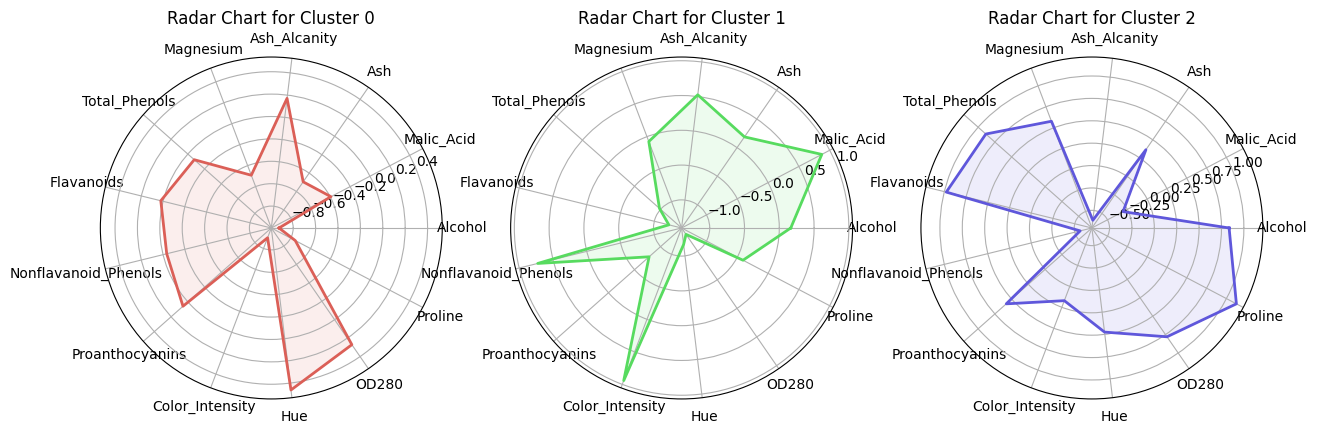

In [ ]:
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt

# 가장 빈번하게 발생한 군집화 결과물 선택
most_frequent_result = max(unique_results, key=lambda x: x['count'])
centroids = most_frequent_result['centroids']
categories = data.columns[:-1].tolist()  # 'Cluster' 열 제외
N = len(categories)

# Radar Chart 그리기
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(projection="polar"))
colors = sns.color_palette("hls", 3)

for i in range(3):
    values = centroids[i].tolist()
    values += values[:1]  # 첫 번째 값을 다시 추가해 길이를 맞춤
    ax[i].plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {i}", color=colors[i])
    ax[i].fill(angles, values, color=colors[i], alpha=0.1)
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(categories)
    ax[i].set_title(f'Radar Chart for Cluster {i}')

plt.show()


In [ ]:
import pandas as pd
from scipy import stats

# 가장 빈번하게 발생한 군집화 결과물 선택
most_frequent_result = max(unique_results, key=lambda x: x['count'])

# Cluster 0과 Cluster 2 데이터 추출
cluster_0 = data[data['Cluster'] == 0]
cluster_2 = data[data['Cluster'] == 2]

# H0: Average of Cluster 0 = Average of Cluster 2
# H1:
# - First column: Average of Cluster 0 ≠ Average of Cluster 2
# - Second column: Average of Cluster 0 > Average of Cluster 2
# - Third column: Average of Cluster 0 < Average of Cluster 2

# 통계적 검정 수행
results_A_B = []
for column in data.columns[:-1]:  # 마지막 컬럼은 'Cluster'이므로 제외
    two_sided = stats.ttest_ind(cluster_0[column], cluster_2[column], equal_var=False).pvalue
    greater = stats.ttest_ind(cluster_0[column], cluster_2[column], equal_var=False, alternative='greater').pvalue
    less = stats.ttest_ind(cluster_0[column], cluster_2[column], equal_var=False, alternative='less').pvalue
    results_A_B.append({'Variable': column, 'Two_Sided': two_sided, 'Greater': greater, 'Less': less})
results_A_B = pd.DataFrame(results_A_B)

# 유의수준 0.05에서 값의 차이가 나타나는 변수의 비중 계산
significant_A_B = results_A_B[results_A_B['Two_Sided'] < 0.05]
significant_A_B_ratio = len(significant_A_B) / len(data.columns[:-1])

# Cluster 1과 Cluster 2 데이터 추출
cluster_1 = data[data['Cluster'] == 1]

# H0: Average of Cluster 1 = Average of Cluster 2
# H1:
# - First column: Average of Cluster 1 ≠ Average of Cluster 2
# - Second column: Average of Cluster 1 > Average of Cluster 2
# - Third column: Average of Cluster 1 < Average of Cluster 2

# 통계적 검정 수행
results_X_Y = []
for column in data.columns[:-1]:  # 마지막 컬럼은 'Cluster'이므로 제외
    two_sided = stats.ttest_ind(cluster_1[column], cluster_2[column], equal_var=False).pvalue
    greater = stats.ttest_ind(cluster_1[column], cluster_2[column], equal_var=False, alternative='greater').pvalue
    less = stats.ttest_ind(cluster_1[column], cluster_2[column], equal_var=False, alternative='less').pvalue
    results_X_Y.append({'Variable': column, 'Two_Sided': two_sided, 'Greater': greater, 'Less': less})
results_X_Y = pd.DataFrame(results_X_Y)

# 유의수준 0.05에서 값의 차이가 나타나는 변수의 비중 계산
significant_X_Y = results_X_Y[results_X_Y['Two_Sided'] < 0.05]
significant_X_Y_ratio = len(significant_X_Y) / len(data.columns[:-1])

# 결과 출력
print("Results for Cluster 0 vs Cluster 2:")
print(results_A_B)
print(f"\nProportion of significant differences (p < 0.05): {significant_A_B_ratio:.5f}")

print("\nResults for Cluster 1 vs Cluster 2:")
print(results_X_Y)
print(f"\nProportion of significant differences (p < 0.05): {significant_X_Y_ratio:.5f}")


Results for Cluster 0 vs Cluster 2:
                Variable     Two_Sided       Greater          Less
0                Alcohol  1.018635e-14  1.000000e+00  5.093173e-15
1             Malic_Acid  1.475032e-10  1.000000e+00  7.375160e-11
2                    Ash  1.075500e-04  9.999462e-01  5.377501e-05
3           Ash_Alcanity  2.114410e-02  9.894280e-01  1.057205e-02
4              Magnesium  1.118367e-02  9.944082e-01  5.591835e-03
5          Total_Phenols  3.791205e-10  1.895603e-10  1.000000e+00
6             Flavanoids  2.146292e-25  1.073146e-25  1.000000e+00
7   Nonflavanoid_Phenols  7.509477e-05  9.999625e-01  3.754739e-05
8        Proanthocyanins  7.432607e-07  3.716303e-07  9.999996e-01
9        Color_Intensity  4.041358e-18  1.000000e+00  2.020679e-18
10                   Hue  3.690316e-22  1.845158e-22  1.000000e+00
11                 OD280  1.850143e-30  9.250715e-31  1.000000e+00
12               Proline  2.031718e-05  9.999898e-01  1.015859e-05

Proportion of significant

    Number of Clusters  Single Linkage Silhouette  Complete Linkage Silhouette
0                    2                   0.222451                     0.161868
1                    3                   0.182738                     0.203787
2                    4                   0.181078                     0.193825
3                    5                   0.142353                     0.188365
4                    6                   0.121382                     0.175491
5                    7                   0.049821                     0.188596
6                    8                   0.024630                     0.190601
7                    9                   0.017473                     0.178327
8                   10                  -0.006022                     0.172643
9                   11                  -0.028394                     0.159107
10                  12                  -0.052440                     0.150425
11                  13                  -0.060375   

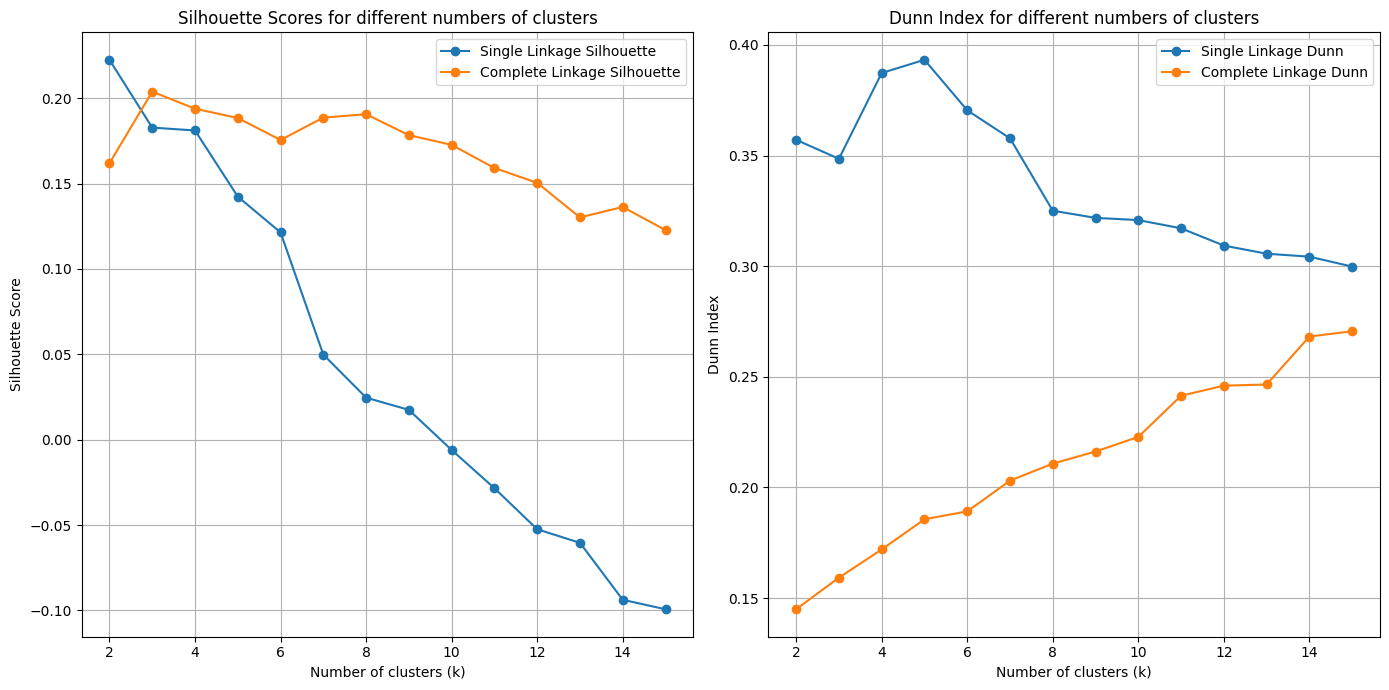

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 군집화 타당성 지표 값을 저장할 리스트 초기화
silhouette_scores_single = []
silhouette_scores_complete = []
dunn_scores_single = []
dunn_scores_complete = []

# 군집 수 설정 (2부터 15까지)
k_values = range(2, 16)

# Single linkage에 대한 군집화 수행 및 Silhouette index, Dunn Index 계산
for k in k_values:
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='single')
    cluster_labels = clusterer.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    dunn_avg = dunn_index(data_scaled, cluster_labels)
    silhouette_scores_single.append(silhouette_avg)
    dunn_scores_single.append(dunn_avg)

# Complete linkage에 대한 군집화 수행 및 Silhouette index, Dunn Index 계산
for k in k_values:
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='complete')
    cluster_labels = clusterer.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    dunn_avg = dunn_index(data_scaled, cluster_labels)
    silhouette_scores_complete.append(silhouette_avg)
    dunn_scores_complete.append(dunn_avg)

# Silhouette index 기준 최적의 군집 수 찾기
best_k_single_silhouette = k_values[silhouette_scores_single.index(max(silhouette_scores_single))]
best_k_complete_silhouette = k_values[silhouette_scores_complete.index(max(silhouette_scores_complete))]

# Dunn index 기준 최적의 군집 수 찾기
best_k_single_dunn = k_values[dunn_scores_single.index(max(dunn_scores_single))]
best_k_complete_dunn = k_values[dunn_scores_complete.index(max(dunn_scores_complete))]

# Silhouette Scores와 Dunn Index를 데이터프레임으로 변환
scores_df1 = pd.DataFrame({
    'Number of Clusters': k_values,
    'Single Linkage Silhouette': silhouette_scores_single,
    'Complete Linkage Silhouette': silhouette_scores_complete,
})

scores_df2 = pd.DataFrame({
    'Number of Clusters': k_values,
    'Single Linkage Dunn': dunn_scores_single,
    'Complete Linkage Dunn': dunn_scores_complete
})

# 데이터프레임 출력
print(scores_df1)
print(scores_df2)

# 최적의 군집 수 결과 출력
print(f'Single linkage에서 Silhouette 기준 최적의 군집 수는 {best_k_single_silhouette}개입니다.')
print(f'Complete linkage에서 Silhouette 기준 최적의 군집 수는 {best_k_complete_silhouette}개입니다.')
print(f'Single linkage에서 Dunn Index 기준 최적의 군집 수는 {best_k_single_dunn}개입니다.')
print(f'Complete linkage에서 Dunn Index 기준 최적의 군집 수는 {best_k_complete_dunn}개입니다.')

# Silhouette index와 Dunn index 시각화
plt.figure(figsize=(14, 7))

# Silhouette index 플롯
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_single, marker='o', label='Single Linkage Silhouette')
plt.plot(k_values, silhouette_scores_complete, marker='o', label='Complete Linkage Silhouette')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.legend()
plt.grid(True)

# Dunn index 플롯
plt.subplot(1, 2, 2)
plt.plot(k_values, dunn_scores_single, marker='o', label='Single Linkage Dunn')
plt.plot(k_values, dunn_scores_complete, marker='o', label='Complete Linkage Dunn')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for different numbers of clusters')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

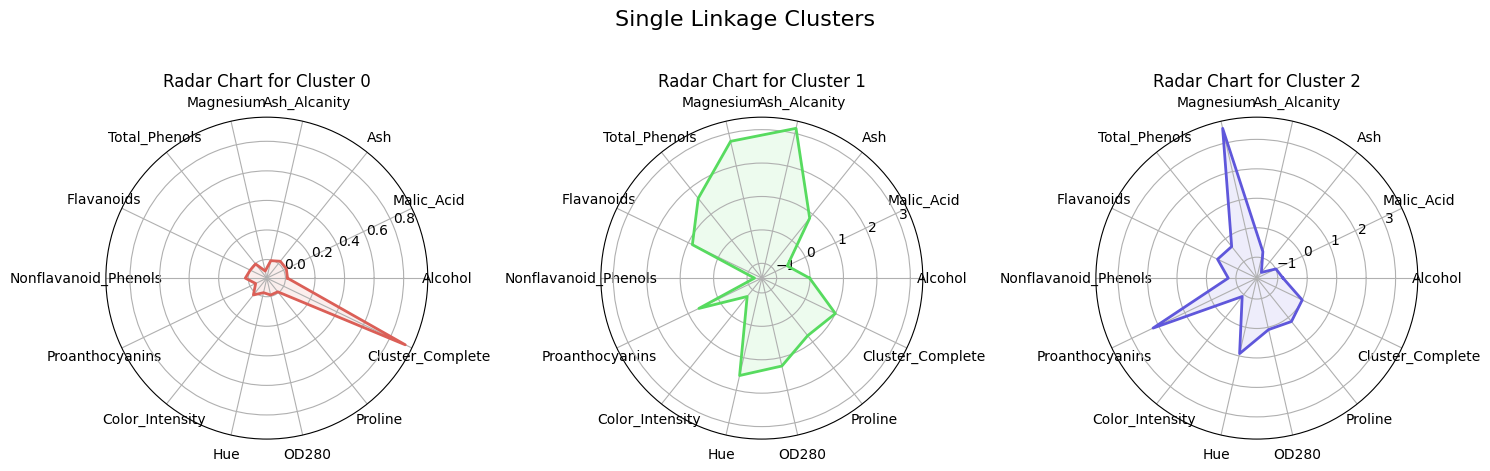

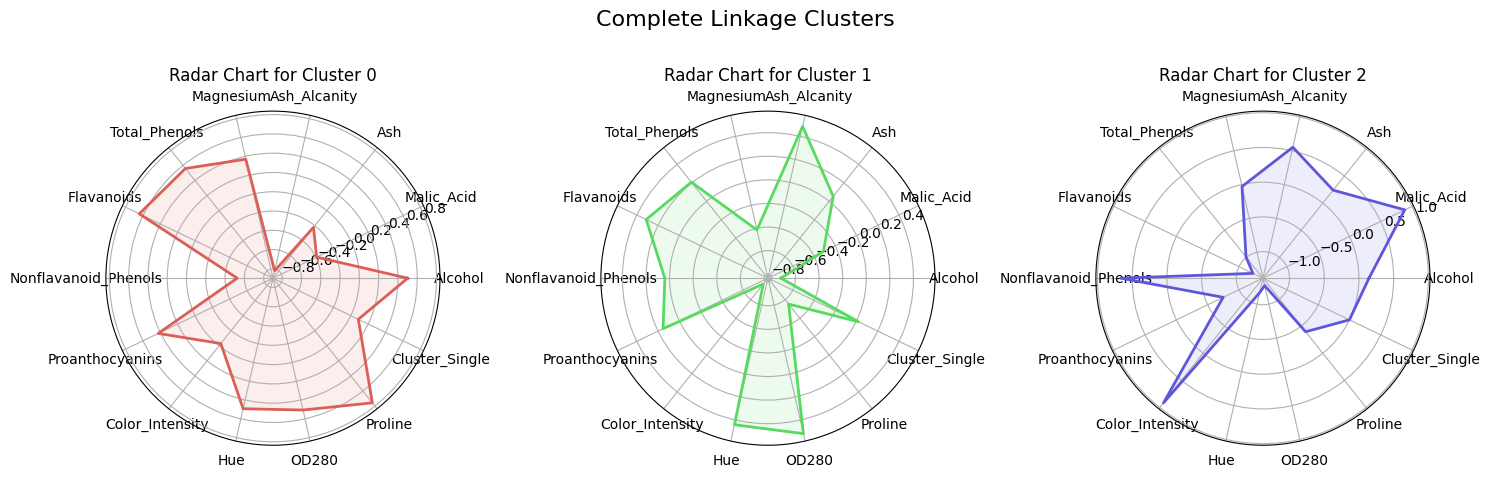

In [ ]:
# Single linkage 군집화 수행
clusterer_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = clusterer_single.fit_predict(data_scaled)
data_scaled['Cluster_Single'] = labels_single

# Complete linkage 군집화 수행
clusterer_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = clusterer_complete.fit_predict(data_scaled)
data_scaled['Cluster_Complete'] = labels_complete

# 각 클러스터의 변수값 평균 계산
cluster_means_single = data_scaled.groupby('Cluster_Single').mean()
cluster_means_complete = data_scaled.groupby('Cluster_Complete').mean()

# Radar Chart 그리기 함수
def create_radar_chart(data, title, num_clusters):
    categories = data.columns.tolist()
    N = len(categories)

    # 각 변수의 값을 기준으로 원을 그릴 각도의 리스트를 생성합니다.
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # 각도를 완전히 닫기 위해 마지막 값을 처음 값으로 추가합니다.

    fig, ax = plt.subplots(1, num_clusters, figsize=(15, 5), subplot_kw=dict(projection="polar"))
    colors = sns.color_palette("hls", num_clusters)

    for i in range(num_clusters):
        values = data.iloc[i].tolist()
        values += values[:1]
        ax[i].plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {i}", color=colors[i])
        ax[i].fill(angles, values, color=colors[i], alpha=0.1)
        ax[i].set_xticks(angles[:-1])
        ax[i].set_xticklabels(categories)
        ax[i].set_title(f'Radar Chart for Cluster {i}')

    plt.suptitle(title, size=16)
    plt.tight_layout()
    plt.show()

# Single linkage Radar Chart
create_radar_chart(cluster_means_single, 'Single Linkage Clusters', 3)

# Complete linkage Radar Chart
create_radar_chart(cluster_means_complete, 'Complete Linkage Clusters',3)

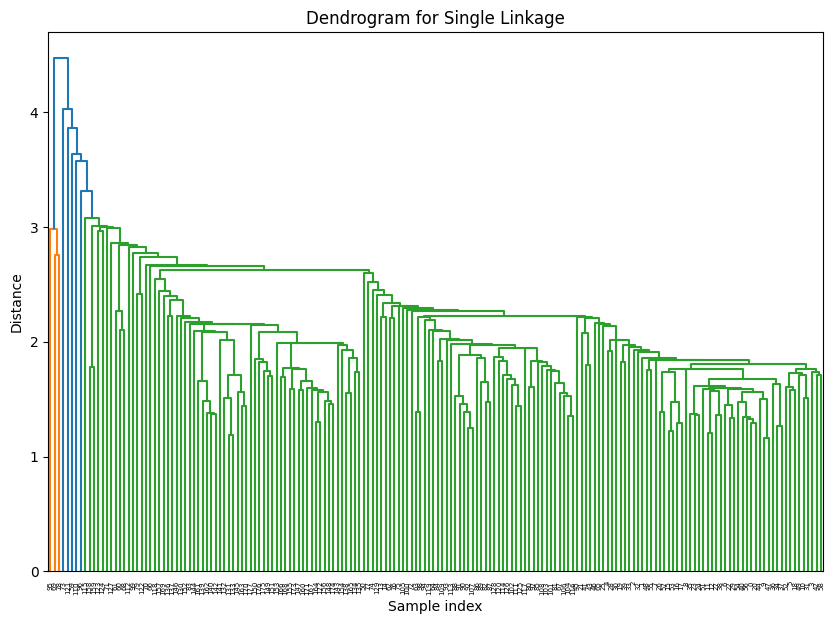

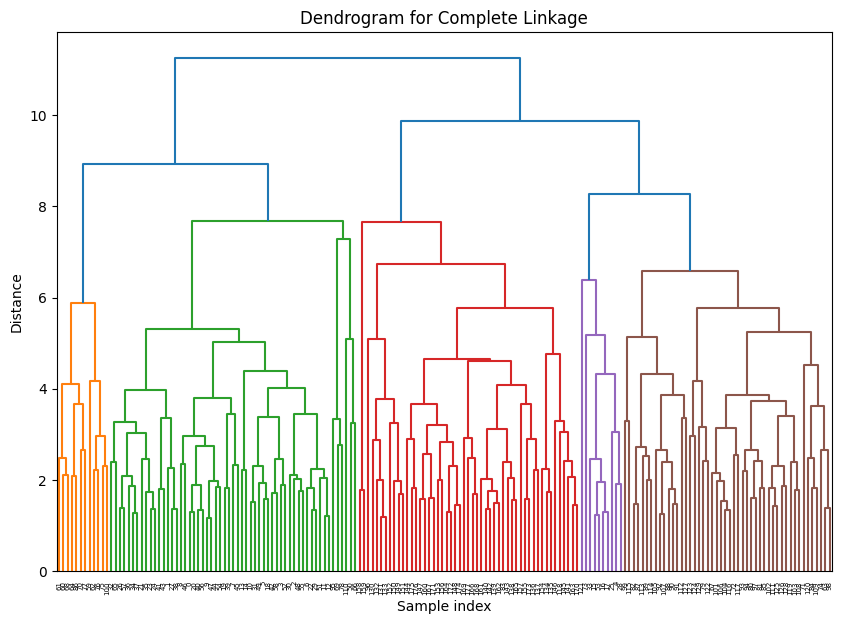

In [ ]:
# Single Linkage 덴드로그램 생성
linkage_matrix_single = linkage(data_scaled, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_single)
plt.title('Dendrogram for Single Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Complete Linkage 덴드로그램 생성
linkage_matrix_complete = linkage(data_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_complete)
plt.title('Dendrogram for Complete Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
# 최적의 eps와 minPts 값을 찾기 위한 변수 초기화
best_eps = None
best_minPts = None
best_num_clusters = 0
best_silhouette = -1

# 최적의 조합들을 저장할 리스트 초기화
best_combinations = []

# eps와 minPts 값의 범위 설정
eps_values = np.arange(0.2, 3.0, 0.2)
minPts_values = range(2, 15)

# 최적의 군집 수를 찾기 위한 반복문
for eps in eps_values:
    for minPts in minPts_values:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        labels = dbscan.fit_predict(data_scaled)

        # 군집 수 계산 (노이즈 포인트는 제외)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # 군집 수가 3일 때 silhouette score 계산
        if num_clusters == 3:
            silhouette_avg = silhouette_score(data_scaled, labels)
            if silhouette_avg > best_silhouette:
                best_eps = eps
                best_minPts = minPts
                best_num_clusters = num_clusters
                best_silhouette = silhouette_avg
                # 최적의 조합 리스트 초기화 및 추가
                best_combinations = [(eps, minPts, silhouette_avg)]
            elif silhouette_avg == best_silhouette:
                # 최적의 조합 추가
                best_combinations.append((eps, minPts, silhouette_avg))

# 결과 출력
print(f'최적의 eps 값: {best_eps:.5f}')
print(f'최적의 minPts 값: {best_minPts}')
print(f'군집 수: {best_num_clusters}')
print(f'Silhouette Score: {best_silhouette:5f}')

print("\n모든 최적의 조합:")
for combo in best_combinations:
    print(f'eps: {combo[0]:5f}, minPts: {combo[1]}, Silhouette Score: {combo[2]:5f}')

최적의 eps 값: 2.20000
최적의 minPts 값: 4
군집 수: 3
Silhouette Score: 0.201647

모든 최적의 조합:
eps: 2.200000, minPts: 4, Silhouette Score: 0.201647


노이즈 포인트의 개수: 51


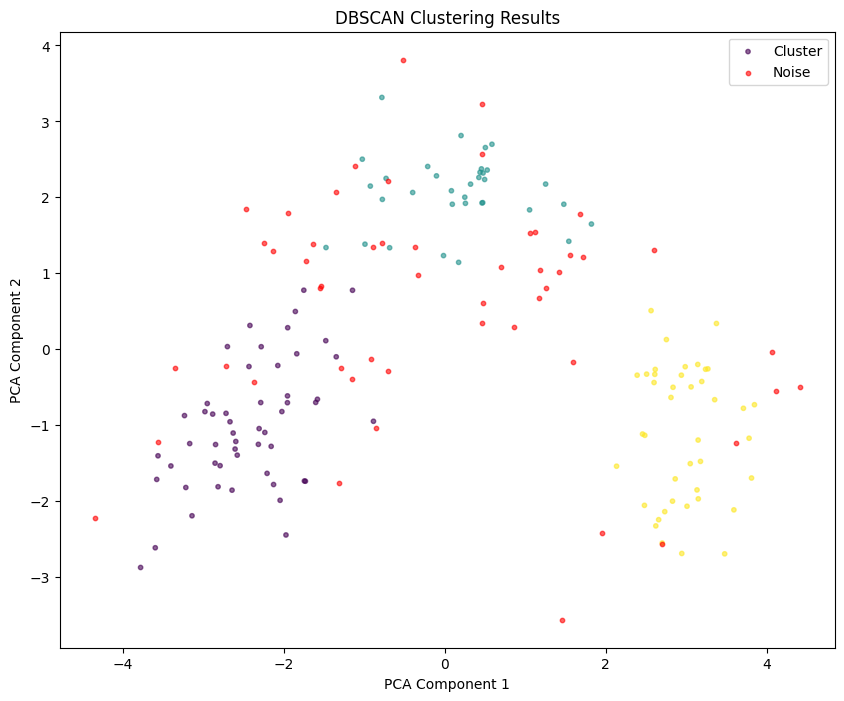

In [ ]:
# 최적의 eps와 minPts 값을 사용하여 DBSCAN 클러스터링 수행
best_eps = 2.2
best_minPts = 4
dbscan = DBSCAN(eps=best_eps, min_samples=best_minPts)
labels = dbscan.fit_predict(data_scaled)

# 노이즈 포인트 수 계산
num_noise_points = np.count_nonzero(labels == -1)
print(f'노이즈 포인트의 개수: {num_noise_points}')

# 데이터프레임에 클러스터 라벨 추가
data['Cluster'] = labels

# 2D 시각화를 위해 PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# 시각화
plt.figure(figsize=(10, 8))
# 클러스터에 속한 포인트
plt.scatter(data[data['Cluster'] != -1]['PCA1'], data[data['Cluster'] != -1]['PCA2'],
            c=data[data['Cluster'] != -1]['Cluster'], cmap='viridis', alpha=0.6, s=10, label='Cluster')
# 노이즈 포인트
plt.scatter(data[data['Cluster'] == -1]['PCA1'], data[data['Cluster'] == -1]['PCA2'],
            c='red', alpha=0.6, s=10, label='Noise')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
